# 텐서플로 공식블로그 튜토리얼 : 기본 이미지 분류
  - https://www.tensorflow.org/tutorials/keras/classification

이번 튜토리얼은 운동화, 셔츠, 가방 등 패션 관련 이미지를 분류하는 신경망 모델을 만들어보는 내용입니다.

In [1]:
# 텐서플로 2.x 버전 선택
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except:
  pass

# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.2.0-rc2


# 패션MNIST 데이터셋 임포트하기

패션MNIST 데이터셋은 10가지 Category의 28 x 28 픽셀의 이미지 70,000개로 이루어져있습니다.

![Fashion MNIST](https://tensorflow.org/images/fashion-mnist-sprite.png)

In [2]:
# Fashion MNIST 데이터셋 불러오기
fashion_mnist = keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# 픽셀의 최대, 최소값 확인
print(train_X.max())
print(train_X.min())

255
0


훈련 데이터셋은 28x28 픽셀의 60,000개의 데이터로 이루어져 있고,<br/>
테스트 데이터는 28x28 픽셀의 10,000개 데이터로 이루어져 있습니다.

각 픽셀은 0과 255 사이의 값입니다.

샘플로 1개 데이터를 조회해보면 아래와 같이 넘파이 배열로 되어있음을 알 수 있습니다.

In [4]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
# 레이블 값 확인
np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

레이블 값은 0부터 9까지의 정수로 이루어져 있으며 각 값은 하나의 레이블에 매핑되어 있습니다. 

데이터셋에는 레이블 이름이 없기 때문에, 나중에 이미지 출력시에 사용하기 위해 별도의 변수로 만들어 저장합니다.

In [0]:
# 0부터 9까지 순서대로 레이블 이름 리스트 변수로 만들기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 확인하기 및 전처리

matplotlib.pyplot의 imshow 함수를 이용하여 이미지 데이터의 실제 모습을 확인할 수 있습니다.

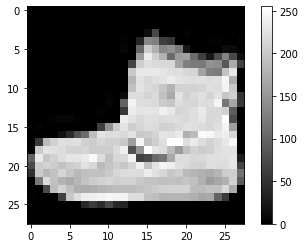

In [7]:
# 이미지 데이터 확인하기
plt.figure()
plt.imshow(train_X[0], cmap = 'gray') # 이미지 불러오기, 이미지 색상 설정
plt.colorbar() # 색과 그 색에 대응하는 값을 알려주는 legend
plt.grid(False)
plt.show()

# 데이터 전처리

모델의 원활한 학습을 위해 0과 255사이에 있는 데이터를 0과 1사이 값을 가지도록 전처리합니다.

In [0]:
train_X = train_X / 255.0
test_X = test_X / 255.0

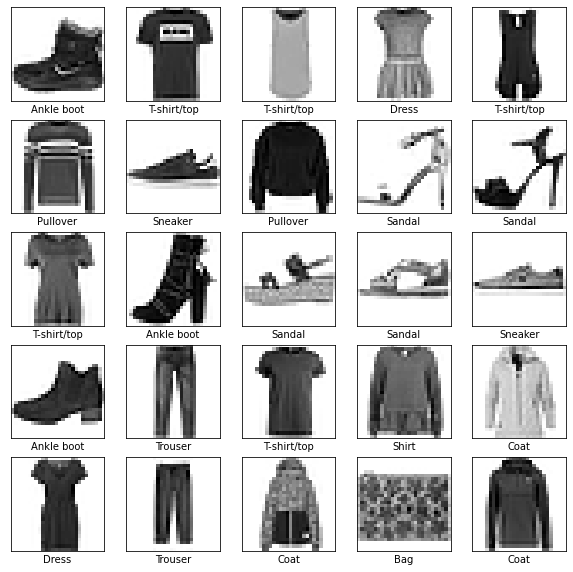

In [9]:
# 전처리 이후 처음 25개의 이미지와 클래스 이름 출력
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_X[i], cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[train_Y[i]])
plt.show()

# 모델 구성

케라스 신경망 구성의 기본요소는 layer입니다. 

In [0]:
# Fashion MNIST 분류 모델
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

첫 번째 Flatten 레이어는 (28 x 28) 픽셀의 이미지 포맷을 784 픽셀의 1차원 배열로 반환합니다.<br/>
Flatten 레이어에서는 별도의 가중치 학습 없이 데이터의 변환만 일어납니다.

2차원의 픽셀을 펼친 후에 두 개의 Dense 레이어가 연결를 통과하여 결과가 출력됩니다.<br/>
<br/>
마지막 레이어의 뉴런 수는 정답 레이블 수와 같은 10개로 설정되어 있습니다.<br/>
각 레이블에 대한 예측 결과를 반환하기 위해 활성화함수로 softmax를 사용했습니다.<br/>
그 결과로 마지막 레이어는 현재 이미지가 10개의 각 클래스에 속할 확률 값을 출력합니다.



# 모델 컴파일

모델을 훈련하기 전에 컴파일 단계에서 몇 가지 설정이 추가됩니다.

* loss : 학습 과정에서 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수의 값을 최소화해야합니다.

* optimizer : 데이터와 손실함수를 바탕으로 모델의 업데이트 방향을 결정합니다.

* metrics : 훈련단계와 테스트 단계를 모니터링하기 위해 사용합니다.

In [11]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


첫 번째 Dense 레이어의 경우,<br/>
( Flatten의 출력값 784개 + bias 1개 ) * (출력뉴런수 128개) = 100,480개의 파라미터를 가집니다.

두 번째 Dense 레이어의 경우,<br/>
( 첫 번째 Dense 레이어의 출력값 128개 + bias 1개 ) * (출력뉴런수 10개) = 1,290개의 파라미터를 가집니다.

# 모델의 학습

데이터를 25번 학습하면서, 훈련 데이터의 25%를 검증 데이터로 사용하였습니다.

In [12]:
# Fashion MNIST 분류모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5255 - accuracy: 0.8156 - val_loss: 0.4346 - val_accuracy: 0.8447
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3926 - accuracy: 0.8591 - val_loss: 0.3805 - val_accuracy: 0.8611
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3477 - accuracy: 0.8721 - val_loss: 0.3558 - val_accuracy: 0.8728
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3243 - accuracy: 0.8818 - val_loss: 0.3527 - val_accuracy: 0.8728
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3054 - accuracy: 0.8885 - val_loss: 0.3389 - val_accuracy: 0.8775
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2889 - accuracy: 0.8938 - val_loss: 0.3353 - val_accuracy: 0.8813
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2756 - accuracy: 0.8987 - val_loss: 0.3338 - val_accuracy:

모델이 훈련되면서 각 학습회차별 손실과 정확도가 출력됩니다. <br/>
훈련세트에서는 94%의 정확도, 검증세트에서는 89%의 정확도를 기록했습니다.

25번의 학습과정을 시각화 해보겠습니다.


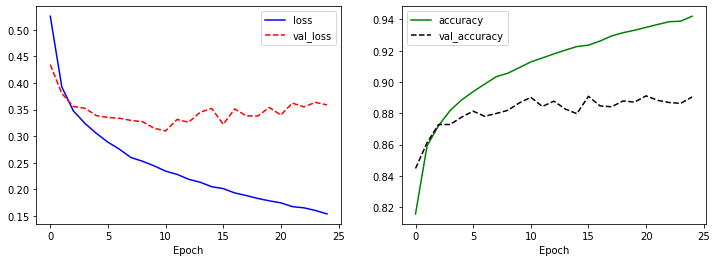

In [15]:
# Fashion MNIST 분류모델 학습결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

검증데이터의 경우, 손실이 감소하다가 Epoch이 10을 넘어가면서 loss가 서서히 증가하는 과적합 현상이 나타나는 것으로 보입니다.

그리고 이어서 테스트세트에 대한 손실과 정확도를 출력해보겠습니다.

In [16]:
# Fashion MNIST 분류 모델 평가
test_loss, test_acc = model.evaluate(test_X, test_Y)
print('test 손실: ', test_loss)
print('test 정확도: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8839
test 손실:  0.3890567421913147
test 정확도:  0.883899986743927


테스트세트의 정확도가 훈련세트의 정확도보다는 조금 낮습니다. 이는 훈련 세트에 대한 과적합 때문입니다.

# 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들어 보겠습니다.

In [17]:
# 예측하기
predictions = model.predict(test_X)
print(predictions.shape)
predictions

(10000, 10)


array([[2.26685351e-10, 6.09531685e-14, 1.46742285e-10, ...,
        2.57840584e-04, 5.24458921e-10, 9.99737084e-01],
       [9.48070829e-06, 2.90586273e-16, 9.99115646e-01, ...,
        4.45301101e-22, 7.27067332e-15, 1.38377951e-14],
       [3.71088988e-15, 1.00000000e+00, 9.08365081e-19, ...,
        4.04194789e-34, 3.20423248e-19, 6.12813382e-28],
       ...,
       [1.48329959e-09, 4.96019992e-19, 9.67654429e-11, ...,
        7.98545224e-15, 9.99999881e-01, 1.60382187e-22],
       [1.18905835e-13, 1.00000000e+00, 1.19603551e-15, ...,
        1.05979996e-20, 1.44409902e-14, 6.51085258e-15],
       [1.32027708e-07, 1.95064559e-13, 6.25192031e-09, ...,
        1.86196659e-04, 8.34080856e-06, 3.73068643e-09]], dtype=float32)

10000개의 예측데이터는 마지막 레이어의 활성함수로 사용된 softmax 함수의 결과로,<br/>
10개의 확률값을 가지는 배열로 나타납니다.

In [19]:
print('첫 번째 테스트 데이터의 예측 결과: ')
print(predictions[0])
print('가장 높은 확률 값의 인덱스: ', np.argmax(predictions[0]))
print('해당 인덱스의 확률값: ', np.max(predictions[0]))
print('실제 Y값: ', test_Y[0])

첫 번째 테스트 데이터의 예측 결과: 
[2.2668535e-10 6.0953169e-14 1.4674228e-10 3.9489121e-15 7.3587825e-10
 5.0392259e-06 5.9124319e-09 2.5784058e-04 5.2445892e-10 9.9973708e-01]
가장 높은 확률 값의 인덱스:  9
해당 인덱스의 확률값:  0.9997371
실제 Y값:  9


모델은 첫 번째 테스트 데이터를 9(Ankle Boots)로 예측하였고, 실제값도 이와 동일합니다.

이번에는 보다 편리하게 예측결과를 확인할 수 있도록 10개 클래스에 대한 예측결과를 시각화해보겠습니다.

In [0]:
# 예측에 대한 시각화함수
def plot_image(i, predictions_array, true_labels, imgs):
  prediction_array, true_label, img = predictions_array[i], true_labels[i], imgs[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_labels):
  prediction_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

500번째 원소 이미지, 예측, 신뢰도점수 배열을 확인해보겠습니다.

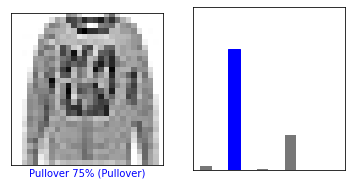

In [42]:
i = 500
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_Y)

처음 몇개의 이미지와 그에 대한 예측결과를 한꺼번에 출력해보겠습니다.

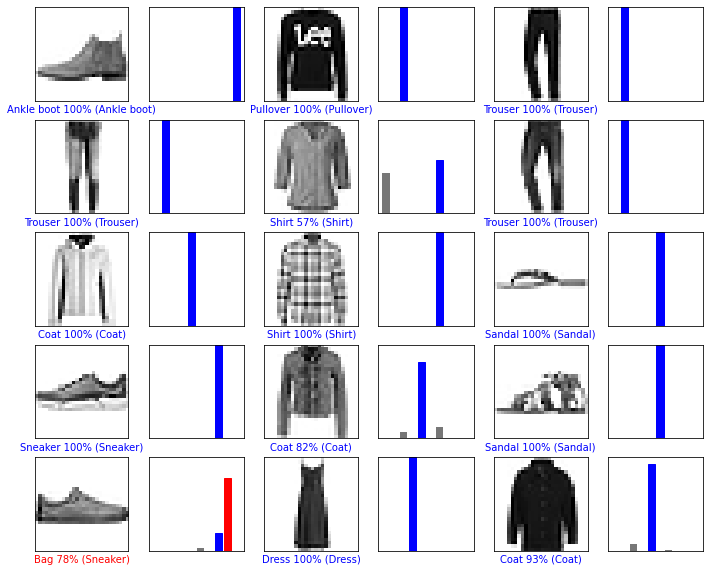

In [43]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_Y, test_X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_Y)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만들어보겠습니다.

In [62]:
# 테스트 세트에서 이미지를 하나 선택하기
img = test_X[0]
print(img.shape)

(28, 28)


keras 모델은 한 번에 샘픙의 묶음(batch)로 예측을 만드는데 최적화되어 있습니다.<br/>
때문에 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다.

In [63]:
# 하나의 이미지를 사용할 때에도 2차원으로 만들어줍니다.
img = np.expand_dims(img,0) 
img.shape

(1, 28, 28)

이제 이 이미지에 대한 예측을 만들어보겠습니다.

In [64]:
predictions_single = model.predict(img)
predictions_single

array([[2.2668535e-10, 6.0953053e-14, 1.4674201e-10, 3.9489273e-15,
        7.3587964e-10, 5.0392259e-06, 5.9124319e-09, 2.5784035e-04,
        5.2445892e-10, 9.9973708e-01]], dtype=float32)

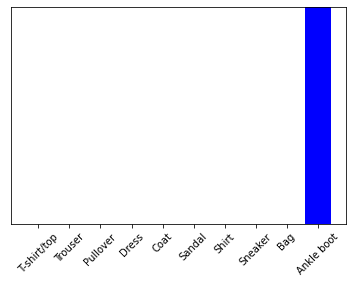

In [65]:
plot_value_array(0, predictions_single, test_Y)
plt.xticks(range(10), class_names, rotation = 45)
plt.show()

처음 수행했던 것과 마찬가지로 모델은 레이블 9, Ankle boot로 예측을 했습니다.